#Character Recognition

## Import Required Packages

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2 as cv
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/alphabets.zip -d /content/Alphabets/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Alphabets/english_alphabets/G/3428.jpg  
  inflating: /content/Alphabets/english_alphabets/G/343.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3430.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3433.jpg  
  inflating: /content/Alphabets/english_alphabets/G/358.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3635.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3654.jpg  
  inflating: /content/Alphabets/english_alphabets/G/366.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3671.jpg  
  inflating: /content/Alphabets/english_alphabets/G/3673.jpg  
  inflating: /content/Alphabets/english_alphabets/G/368.jpg  
  inflating: /content/Alphabets/english_alphabets/G/369.jpg  
  inflating: /content/Alphabets/english_alphabets/G/373.jpg  
  inflating: /content/Alphabets/english_alphabets/G/375.jpg  
  inflating: /content/Alphabets/english_alphabets/G/379.jpg  
  inflating:

In [8]:
alphabets = os.listdir('/content/Alphabets/english_alphabets')
main_list = []
for i in range(len(alphabets)):
    sub_list=[]
    os.chdir('/content/Alphabets/english_alphabets/{}'.format(alphabets[i]))
    imgs = os.listdir()
    for j in imgs:
        img = cv.imread(j,-1).flatten()
        sub_list.append([img,alphabets[i]])
    main_list.append(sub_list)

### DataFrame creation for easy processing and modelling.

In [9]:
df_main_list = []
for i in range(26):
    df = pd.DataFrame(main_list[i])
    df_main_list.append(df)
df = pd.concat(df_main_list,axis=0,ignore_index=True)
df = pd.concat([df[0].apply(pd.Series),df[1]],axis=1,ignore_index=True) # Explode the lists
# shuffle all the  rows
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156
0,2,0,16,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,V
1,0,0,0,0,1,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,C
2,3,0,0,5,19,0,5,4,14,1,...,0,0,0,0,0,0,0,0,0,P
3,0,0,0,0,1,2,2,1,0,3,...,0,0,0,0,0,0,0,0,0,O
4,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,G


### Split Train and test sets.

In [11]:
Y = df.pop(1156)
x_train,x_test,y_train,y_test = train_test_split(df,Y,test_size=0.3,stratify=Y)

### Let's plot some alphabets to get the general idea.

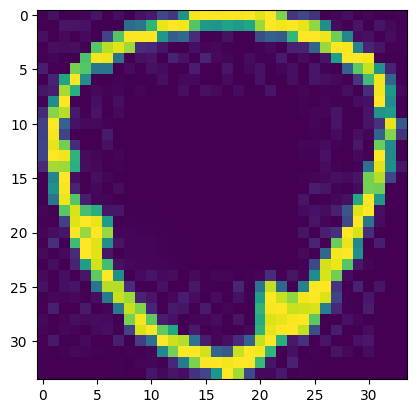

In [12]:
 def show(image):
    """
    Pass the index number of the row/datapoint to view its plot
    """
    a = x_train.iloc[image].values.reshape(34,34)
    plt.imshow(a)
    plt.show()
show(120)

# Exploratory Data Analysis

In [13]:
# Get basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Columns: 1156 entries, 0 to 1155
dtypes: uint8(1156)
memory usage: 7.5 MB


In [14]:
# number of datapoints available for each class
Y.value_counts()

A    391
N    350
P    336
C    297
O    292
F    284
L    282
D    274
B    272
X    272
S    263
M    261
Q    251
G    250
E    249
V    244
Z    240
R    239
W    237
U    237
H    229
J    227
T    226
K    217
Y    210
I    201
Name: 1156, dtype: int64

In [15]:
# Check whether there are any null/missing values.
print(f"The number of Null values in the dataframe : {df.isna().values.flatten().sum()}")

The number of Null values in the dataframe : 0


## SVM

In [19]:
svm_pipe = make_pipeline(StandardScaler(),SVC())
svm_pipe.fit(x_train,y_train)
y_pred = svm_pipe.predict(x_test)
print(f"ACCURACY : {accuracy_score(y_test,y_pred)}")

ACCURACY : 0.9014634146341464
